# **Objective**
**To segment customers into groups for a targeted marketing strategy.**

## Data
- Source: [Credit Card Dataset for Clustering (Kaggle)](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)
- Original source: Unknown

## Problem Statement
The marketing department for a credit card company wants to learn more about the different kinds of customers they have, in order to develop a marketing strategy that targets each group separately. As a data scientist, the task is to:
1. Identify the best way to cluster customers into groups.
2. Provide a clear description of each group to guide marketing strategies.


## Sample Dataset Information
The dataset summarizes the usage behavior of approximately 9000 active credit card holders over the last 6 months. It includes 18 behavioral variables at the customer level.

### Data Dictionary

| **Variable**                     | **Description**                                                                                         | **Type**        |
|---------------------------------|---------------------------------------------------------------------------------------------------------|-----------------|
| **CUST_ID**                      | Identification of the Credit Card holder                                                                | Categorical     |
| **BALANCE**                      | Balance amount left in their account to make purchases                                                  | Numerical       |
| **BALANCE_FREQUENCY**           | How frequently the Balance is updated (score between 0 and 1)                                           | Numerical (0–1) |
| **PURCHASES**                    | Total amount of purchases made from the account                                                         | Numerical       |
| **ONEOFF_PURCHASES**            | Maximum purchase amount done in one go                                                                  | Numerical       |
| **INSTALLMENTS_PURCHASES**       | Amount of purchase done in installments                                                                 | Numerical       |
| **CASH_ADVANCE**                 | Cash in advance taken by the user                                                                      | Numerical       |
| **PURCHASES_FREQUENCY**          | How frequently the Purchases are made (score between 0 and 1)                                          | Numerical (0–1) |
| **ONEOFFPURCHASESFREQUENCY**     | How frequently purchases are happening in one go (score between 0 and 1)                               | Numerical (0–1) |
| **PURCHASESINSTALLMENTSFREQUENCY** | How frequently purchases in installments are made (score between 0 and 1)                              | Numerical (0–1) |
| **CASHADVANCEFREQUENCY**         | How frequently the cash in advance is taken (score between 0 and 1)                                    | Numerical (0–1) |
| **CASHADVANCETRX**               | Number of transactions made with "Cash in Advance"                                                      | Numerical       |
| **PURCHASES_TRX**                | Number of purchase transactions made                                                                    | Numerical       |
| **CREDIT_LIMIT**                 | Credit card limit for the user                                                                          | Numerical       |
| **PAYMENTS**                     | Total amount of payment done by the user                                                                | Numerical       |
| **MINIMUM_PAYMENTS**             | Minimum amount of payments made by the user                                                             | Numerical       |
| **PRCFULLPAYMENT**               | Percent of full payment paid by the user                                                                | Numerical       |
| **TENURE**                       | Tenure of the credit card service for the user (in months)                                              | Numerical       |


# **1. Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Loading the csv file into pandas data frame called 'Data'
Data = pd.read_csv('CC General.csv')

In [3]:
Data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
# Printing out the dataframe's first five rows
Data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Data Summary
Data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Summary and Key Insights
---

### 1. Overall Impressions

| Observation | Details                                                                                               |
|-------------|-------------------------------------------------------------------------------------------------------|
| Record Count | Most columns have **8,950** entries. <br> **CREDIT_LIMIT** has 8,949 entries. <br> **MINIMUM_PAYMENTS** has 8,637 entries. |
| Missing Values | Missing entries in **CREDIT_LIMIT** (1 missing) and **MINIMUM_PAYMENTS** (313 missing).            |
| Right-Skewed Distribution | Monetary variables (e.g., `BALANCE`, `PURCHASES`, `PAYMENTS`) have **mean > median**, indicating a few high-value outliers. |
| Frequency-Based Variables | Most scores (e.g., `PURCHASES_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`) range **0–1**, but `CASH_ADVANCE_FREQUENCY` has a max of **1.5**, suggesting **outliers or data entry errors**. |

---

### 2. Detailed Insights by Key Features

| Feature                               | Mean (approx) | Median (approx) | Max (approx)  | Observations                                                                                                                                                  |
|---------------------------------------|---------------|-----------------|---------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **BALANCE**                           | 1564          | 873             | 19,043        | Large gap between mean and median; indicates a minority with very large balances (right-skew).                                                                |
| **BALANCE_FREQUENCY** (0–1 scale)     | 0.88          | 1.00            | 1.00          | Most customers have balances updated frequently. A small group has less frequent updates.                                                                     |
| **PURCHASES**                         | 1003          | 361             | 49,039        | Wide range; some customers have very high purchase amounts compared to the majority.                                                                          |
| **ONEOFF_PURCHASES**                  | 592           | 38              | 40,761        | Large disparity between median and max; only a few make very large single transactions.                                                                        |
| **INSTALLMENTS_PURCHASES**            | 411           | 89              | 22,500        | Some use installment plans heavily; others do not use them at all.                                                                                            |
| **CASH_ADVANCE**                      | 979           | 0               | 47,137        | Over half do not use cash advances; a smaller subset uses them extensively.                                                                                   |
| **PURCHASES_FREQUENCY** (0–1 scale)   | 0.49          | 0.50            | 1.00          | Indicates moderate purchase frequency overall; some purchase very frequently, others rarely.                                                                  |
| **ONEOFF_PURCHASES_FREQUENCY** (0–1)  | 0.20          | 0.08            | 1.00          | Most customers rarely make one-off purchases.                                                                                                                 |
| **PURCHASES_INSTALLMENTS_FREQUENCY** (0–1) | 0.36    | 0.17            | 1.00          | Some rely on installment purchases; many do not.                                                                                                             |
| **CASH_ADVANCE_FREQUENCY** (0–1 scale) | 0.14          | 0.00            | 1.50          | Max of 1.5 is a **data anomaly** (above stated 0–1 range).                                                                                                    |
| **CASH_ADVANCE_TRX**                  | 3.25          | 0               | 123           | Many have no cash-advance transactions; a small group uses them multiple times.                                                                               |
| **PURCHASES_TRX**                     | 14.71         | 7               | 358           | Some customers have few purchase transactions, others have very many.                                                                                        |
| **CREDIT_LIMIT**                      | 4494          | 3000            | 30,000        | Credit limits vary from as low as \$50 to \$30K.                                                                                                              |
| **PAYMENTS**                          | 1733          | 857             | 50,721        | Small group makes extremely large payments; most make moderate amounts.                                                                                      |
| **MINIMUM_PAYMENTS**                  | 864           | 312             | 76,406        | Very high max suggests outliers or large cumulative minimum dues; many have small minimum payments.                                                          |
| **PRC_FULL_PAYMENT** (0–1 scale)      | 0.15          | 0.00            | 1.00          | Most do not pay in full regularly; a small group pays in full consistently.                                                                                   |
| **TENURE**                            | 11.52         | 12              | Range: 6–12   | Most customers have had the card for 12 months; a smaller subset for less than that.                                                                          |

---

### 3. Key Takeaways

| Takeaway                                          | Explanation                                                                                                                                  |
|---------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| **High Skewness in Monetary Values**              | A small group of high-value customers drives up the means for `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `PAYMENTS`, `MINIMUM_PAYMENTS`.         |
| **Two Distinct User Segments (At Least)**         | - Large group with low one-off purchases, minimal or zero cash advances<br>- Smaller group with high balances, frequent cash advances        |
| **Credit Limit Variations**                       | Ranges from 50 dollars to 30,000 dollars, indicating different risk profiles and spending capacities.                                                    |
| **Payment Behaviors**                             | Many revolve balances (low `PRC_FULL_PAYMENT`), while a minority pays in full regularly.                                                     |
| **Frequency vs. Amount**                          | Some buy **infrequently** with **large amounts**; others buy **frequently** in **smaller amounts**.                                          |
| **Data Quality Concerns**                         | - `CASH_ADVANCE_FREQUENCY` max at 1.5 suggests a data-entry error<br>- Missing values in **CREDIT_LIMIT** & **MINIMUM_PAYMENTS** |


---

### 4. Conclusion

| Conclusion                                                                                                                                     |
|------------------------------------------------------------------------------------------------------------------------------------------------|
| The dataset shows at least a **multi-segment** pattern: a larger group with modest activity and a smaller group with very high credit usage. **Frequency metrics** reveal differing engagement styles (installments vs. one-off). To perform effective **clustering**, we must handle **missing data**, manage **outliers**, and **scale** the skewed variables. |


In [6]:
# Checking the Data information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
# Finding Duplicated values in the dataframe
Data.duplicated().sum()

0

In [8]:
# Printing how many missing values are in each column
Data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Handling missing values by Median Imputation
# Both MINIMUM_PAYMENTS and CREDIT_LIMIT are right skewed distributions it is less affected by outliers than the mean imputation. 


median_credit_limit = Data['CREDIT_LIMIT'].median()
Data['CREDIT_LIMIT'].fillna(median_credit_limit, inplace = True)

median_min_pay = Data['MINIMUM_PAYMENTS'].median()
Data['MINIMUM_PAYMENTS'].fillna(median_min_pay, inplace = True)



In [10]:
# Checking for missing values again after median imputation
Data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Handling Missing Values with Median Imputation

After identifying that `CREDIT_LIMIT` had 1 missing value and `MINIMUM_PAYMENTS` had 313 missing values, we used **median imputation** for both columns. This strategy replaces each missing value with the median of its respective column.

**Why the median?**  
Both `CREDIT_LIMIT` and `MINIMUM_PAYMENTS` show right-skewed distributions, so using the median is generally more reliable than the mean. The median is less sensitive to extreme outliers, making it a better fit for skewed data.


In [11]:
# Splitting the data
features = Data.drop(columns=['CUST_ID'])

In [12]:
# Displaying correlation matrix of the features using seaborn.heatmap

# Computing the correlation matrix
correlation_matrix = features.corr()
correlation_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


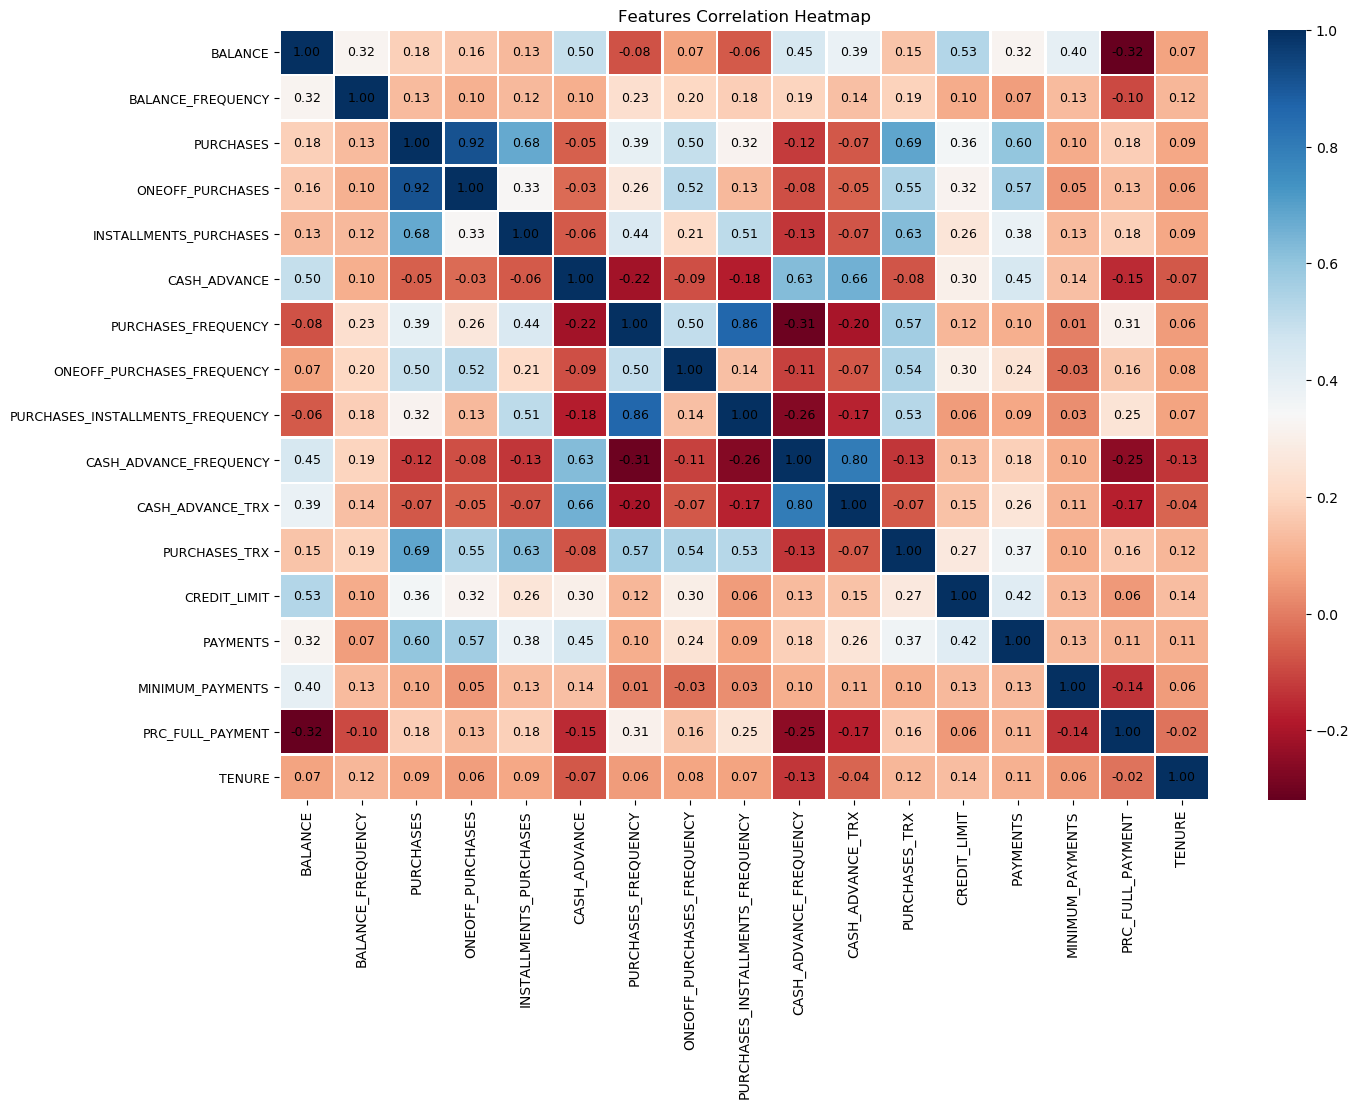

In [13]:
# Plotting the heatmap from the correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=1, annot_kws={"color": "black","size": 9} )
plt.title('Features Correlation Heatmap')
plt.yticks(fontsize=9)
plt.show()

### Key Observations and Insights from Correlation Matrix

| **Category**                  | **Observation**                                                                                                                                                      |
|-------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Strong Positive Correlations** |                                                                                                                                                                   |
| PURCHASES vs. ONEOFF_PURCHASES (0.92)         | Total purchases are heavily influenced by one-off purchases.                                                                                                 |
| CASH_ADVANCE vs. CASH_ADVANCE_FREQUENCY (0.63) and CASH_ADVANCE_TRX (0.66) | Cash advance amounts, frequency, and transactions are highly correlated; customers who use cash advances tend to do so frequently and in large amounts.        |
| PURCHASES vs. PURCHASES_TRX (0.69)            | Frequent purchases drive higher purchase totals.                                                                                                             |
| PURCHASES_FREQUENCY vs. PURCHASES_INSTALLMENTS_FREQUENCY (0.86) | Frequent purchasers tend to favor installment purchases.                                                                                                     |
| BALANCE vs. CREDIT_LIMIT (0.53)               | Customers with higher credit limits tend to maintain higher balances.                                                                                        |
| **Moderate Positive Correlations** |                                                                                                                                                                   |
| BALANCE vs. CASH_ADVANCE (0.50)               | Customers with higher balances often take more cash advances, possibly due to lack of available credit.                                                      |
| CREDIT_LIMIT vs. PAYMENTS (0.42)              | Customers with higher credit limits tend to make larger payments, reflecting higher spending capacity.                                                       |
| PAYMENTS vs. PURCHASES (0.60)                 | Customers making higher payments are also higher spenders.                                                                                                   |
| BALANCE vs. MINIMUM_PAYMENTS (0.40)           | Higher balances often lead to higher minimum payment requirements.                                                                                           |
| **Weak Positive Correlations** |                                                                                                                                                                   |
| TENURE vs. BALANCE_FREQUENCY (0.12)           | Weak relationship; tenure does not significantly affect balance update frequency.                                                                            |
| PURCHASES_FREQUENCY vs. PRC_FULL_PAYMENT (0.31) | Frequent purchasers are slightly more likely to pay their balance in full.                                                                                   |
| **Strong Negative Correlations** |                                                                                                                                                                   |
| PRC_FULL_PAYMENT vs. BALANCE (-0.32)          | Customers who pay in full tend to carry lower balances.                                                                                                      |
| PRC_FULL_PAYMENT vs. CASH_ADVANCE (-0.15) and CASH_ADVANCE_FREQUENCY (-0.25) | Customers paying in full are less likely to use cash advances.                                                                                               |
| **Weak or No Correlation** |                                                                                                                                                                   |
| TENURE with Most Features                     | Weak correlations; tenure has little impact on spending or payment behavior.                                                                                 |
| PURCHASES vs. CASH_ADVANCE (-0.05)            | Total purchases and cash advances are largely independent behaviors.                                                                                         |

---

### Insights on Behaviour

| **Behavioral Segment**       | **Insights**                                                                                                                                                        |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Distinct Customer Segments** |                                                                                                                                                                 |
| **Frequent Purchasers**         | Customers making frequent purchases tend to favor installment payments, suggesting a preference for managing expenses over time.                                  |
|**Cash Advance Users**    | Customers using cash advances often behave distinctly from frequent purchasers and are less likely to pay balances in full.                                       |
| **High Credit Utilizers**     | Customers with higher credit limits tend to carry higher balances and make larger payments, indicating greater spending and repayment capacity.                   |
| **Low Balance Payers**        | Customers who regularly pay their balances in full tend to carry lower balances and are less likely to use cash advances.                                        |
| **High Balance & Minimum Payment Link** | Higher balances result in higher minimum payment requirements.                                                                                           |

---

### Potential Actions for Customer Segmentation

| **Segment**                  | **Recommended Action**                                                                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **High Spenders**            | Focus marketing efforts on customers with high PURCHASES and PAYMENTS, as they are likely to generate higher revenue.                                              |
| **Cash Advance Users**       | Identify customers frequently using cash advances and provide tailored credit options to reduce their dependency on cash advances.                                 |
| **Full Balance Payers**      | Encourage customers with high PRC_FULL_PAYMENT to increase purchases through reward programs or cashback incentives.                                               |
| **Installment Users**        | Offer targeted installment plans for customers frequently using installments.                                                                                      |

---

### Conclusion

The correlation matrix provides valuable insights into customer behavior:
1. Strong relationships exist between total purchases, purchase frequency, and installment preferences.
2. A clear divide is observed between cash advance users and full balance payers.

These insights can guide **customer segmentation** and **marketing strategies** to effectively target different customer groups.


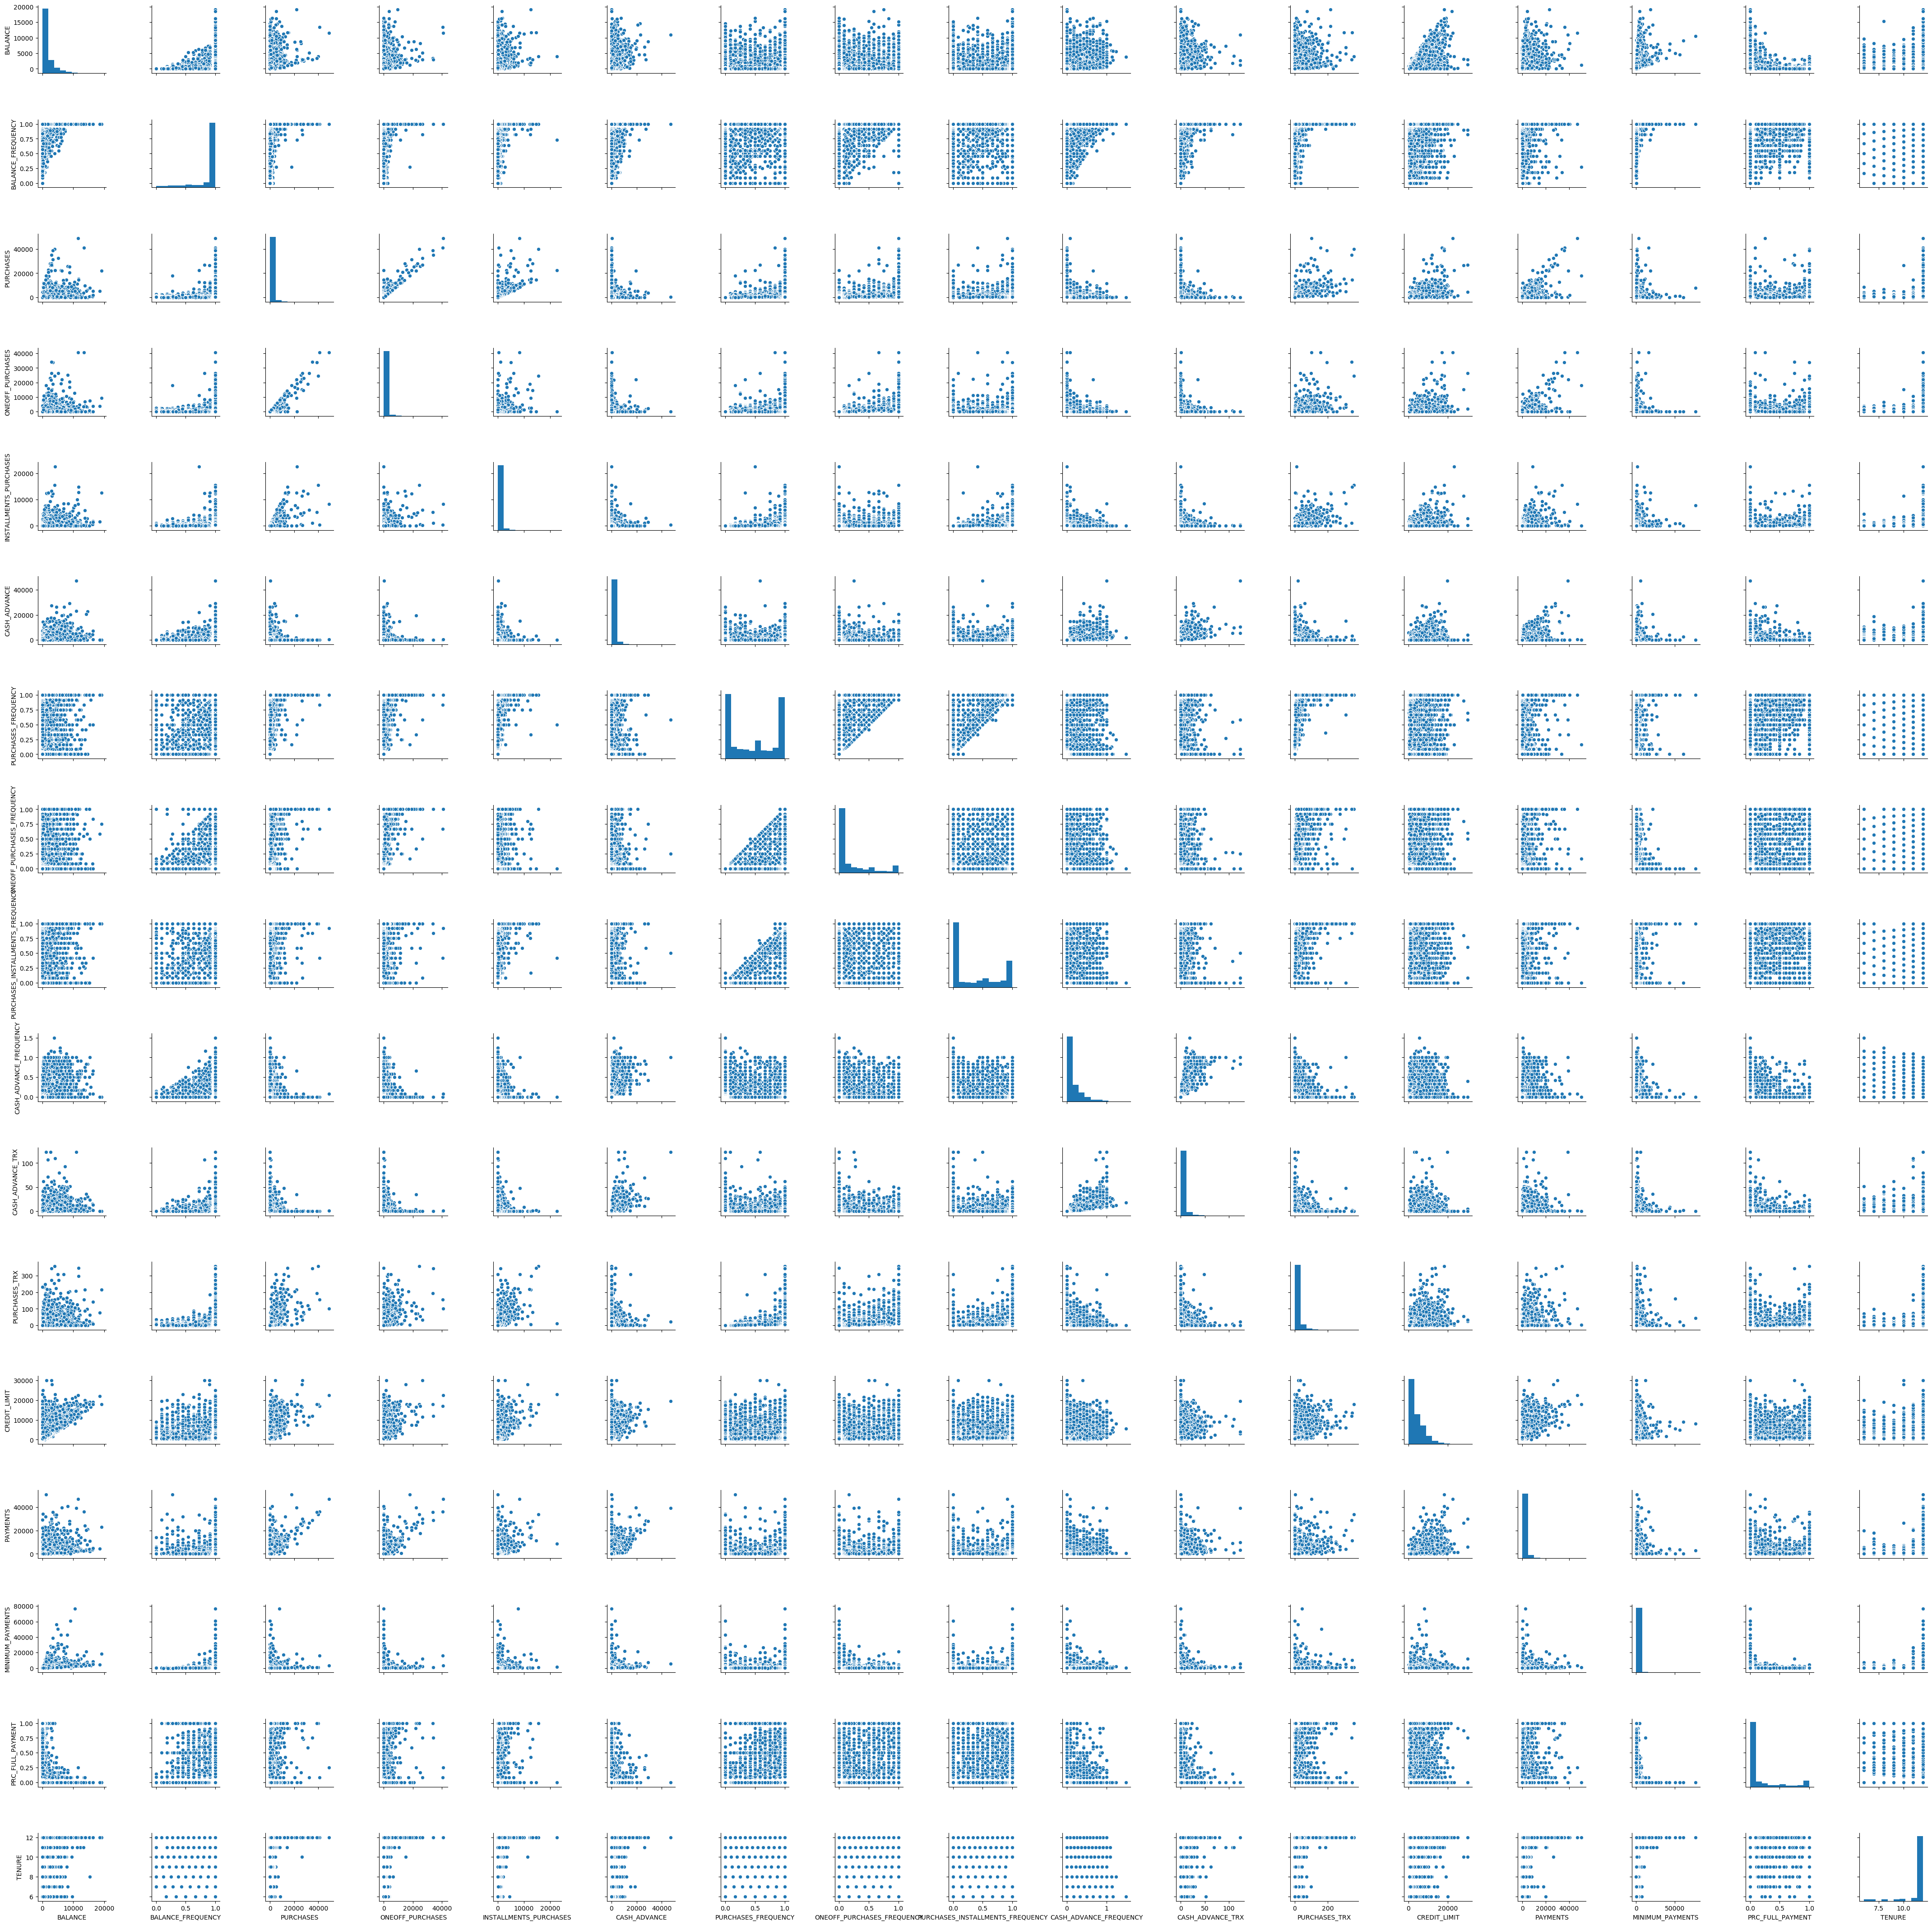

In [14]:
# Select a subset of important features to plot
sns.pairplot(features)
plt.show()

In [15]:
# Cap at 1.0 (stated 0-1 range) for data anomaly
Data['CASH_ADVANCE_FREQUENCY'] = Data['CASH_ADVANCE_FREQUENCY'].clip(upper=1.0)

In [16]:
# Checking the skewness of the variables

print("\n(Skewness of the variables):\n")
for col in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
    print(f"{col}: {Data[col].skew()}")



(Skewness of the variables):

BALANCE: 2.393386042571806
PURCHASES: 8.144269064554651
CASH_ADVANCE: 5.1666090740747235
CREDIT_LIMIT: 1.5226359501884323
PAYMENTS: 5.907619794397562


### Skewness Analysis Summary

---------------------------------------------------------------
| **Feature**       | **Skewness Value** | **Interpretation** |
|-------------------|------------------|------------------|
| **BALANCE**      | **2.39**  | Moderately skewed |
| **PURCHASES**    | **8.14**  | Extremely skewed |
| **CASH_ADVANCE** | **5.17**  | Highly skewed |
| **CREDIT_LIMIT** | **1.52**  | Mildly skewed |
| **PAYMENTS**     | **5.91**  | Highly skewed |

### **Key Observations**
- **PURCHASES (8.14)** is **extremely skewed**, meaning a small number of customers have very high purchase amounts.
- **CASH_ADVANCE (5.17)** and **PAYMENTS (5.91)** also have **high skewness**, indicating that only a few customers make very large transactions.
- **BALANCE (2.39)** and **CREDIT_LIMIT (1.52)** are **moderately skewed** but still require transformation.

---


In [17]:
# Log1 for moderate and mildly skewed feature
import numpy as np
from scipy.stats import boxcox

Data['log_CREDIT_LIMIT'] = np.log1p(Data['CREDIT_LIMIT'])
Data['log_BALANCE'] = np.log1p(Data['BALANCE'])


# Box-Cox for highly skewed data
Data['boxcox_CASH_ADVANCE'], _ = boxcox(Data['CASH_ADVANCE'] + 1)
Data['boxcox_PURCHASES'], _ = boxcox(Data['PURCHASES'] + 1)
Data['boxcox_PAYMENTS'], _ = boxcox(Data['PAYMENTS'] + 1)

In [18]:
print("\n(Skewness of the variables):\n")
for col in ['boxcox_CASH_ADVANCE','boxcox_PURCHASES', 'boxcox_PAYMENTS', 'log_CREDIT_LIMIT', 'log_BALANCE']:
    print(f"{col}: {Data[col].skew()}")


(Skewness of the variables):

boxcox_CASH_ADVANCE: 0.18841297206976743
boxcox_PURCHASES: -0.1786766921312919
boxcox_PAYMENTS: 0.12463045454831398
log_CREDIT_LIMIT: -0.10140769035040573
log_BALANCE: -0.8610205518180273


In [19]:
# Credit utilization
Data['CREDIT_UTILIZATION'] = Data['BALANCE'] / (Data['CREDIT_LIMIT'] + 1e-6)

# Purchase type ratios
Data['INSTALLMENT_RATIO'] = Data['INSTALLMENTS_PURCHASES'] / (Data['PURCHASES'] + 1e-6)
Data['ONEOFF_RATIO'] = Data['ONEOFF_PURCHASES'] / (Data['PURCHASES'] + 1e-6)

# Payment behavior
Data['FULL_PAYMENT_INDICATOR'] = (Data['PRC_FULL_PAYMENT'] > 0.8).astype(int)

In [20]:
# Checking to see if the variable 'CUST_ID' is still in the dataframe
features.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# **2.Modeling**

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [22]:
features_to_scale = [
    'log_BALANCE', 'boxcox_CASH_ADVANCE', 'boxcox_PURCHASES', 'boxcox_PAYMENTS',  'log_CREDIT_LIMIT',
    'MINIMUM_PAYMENTS', 'CREDIT_UTILIZATION', 'INSTALLMENT_RATIO',
    'ONEOFF_RATIO', 'FULL_PAYMENT_INDICATOR', 'BALANCE_FREQUENCY',
    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE'
]

In [23]:
# Using MinMaxScaler to scale the data
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(Data[features_to_scale])

# Coverting scaled features back to the dataframe for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Printing the first few rows of the scaled dataset
scaled_features_df.head()

,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS,log_CREDIT_LIMIT,MINIMUM_PAYMENTS,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
0,0.379045,0.000000,0.224536,0.244633,0.466811,0.001826,0.002571,1.493652e-08,0.000000,0.0,0.818182,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,1.0
1,0.819116,0.876605,0.000000,0.553340,0.771814,0.014034,0.028755,0.000000e+00,0.000000,0.0,0.909091,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,1.0
2,0.793799,0.000000,0.400221,0.338795,0.782631,0.008210,0.020911,0.000000e+00,0.554418,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,1.0
3,0.752871,0.607595,0.470156,0.000000,0.782631,0.004088,0.013968,0.000000e+00,0.554418,0.0,0.636364,0.083333,0.083333,0.000000,0.083333,0.00813,0.002793,1.0
4,0.680676,0.000000,0.118550,0.346965,0.495375,0.003204,0.042830,0.000000e+00,0.554418,0.0,1.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,1.0


In [24]:
scaled_features_df.describe()

,log_BALANCE,boxcox_CASH_ADVANCE,boxcox_PURCHASES,boxcox_PAYMENTS,log_CREDIT_LIMIT,MINIMUM_PAYMENTS,CREDIT_UTILIZATION,INSTALLMENT_RATIO,ONEOFF_RATIO,FULL_PAYMENT_INDICATOR,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.625260,0.353170,0.297213,0.378482,0.652798,0.011058,0.024443,1.451154e-04,0.210522,0.080670,0.877271,0.490351,0.202458,0.364437,0.134972,0.026413,0.041089,0.919553
std,0.204303,0.373928,0.197475,0.136050,0.128526,0.030531,0.024495,1.103156e-02,0.236202,0.272343,0.236904,0.401371,0.298336,0.397448,0.199257,0.055485,0.069435,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.493377,0.000000,0.167913,0.295645,0.540453,0.002236,0.002608,0.000000e+00,0.000000,0.000000,0.888889,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,1.000000
50%,0.687352,0.000000,0.328959,0.369737,0.638980,0.004088,0.019027,2.765006e-09,0.061742,0.000000,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,1.000000
75%,0.774072,0.749156,0.437461,0.455952,0.760195,0.010322,0.045102,1.493652e-08,0.484658,0.000000,1.000000,0.916667,0.300000,0.750000,0.222222,0.032520,0.047486,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Agglomerative clustering

### Using sklearn.cluster.AgglomerativeClustering 

In [25]:
# Creating 10 Parameters list for genearting different models
parameters_list = [{'n_clusters': 3, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'manhattan', 'linkage' : 'single'},
                   {'n_clusters': 3, 'distance_threshold':None, 'affinity' : 'manhattan', 'linkage' : 'single'},
                   {'n_clusters': 4, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': None, 'distance_threshold': 1.7, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 5, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'single'},
                   {'n_clusters': None, 'distance_threshold': 1.5, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': 8, 'distance_threshold': None, 'affinity' : 'euclidean', 'linkage' : 'complete'},
                   {'n_clusters': None, 'distance_threshold': 2, 'affinity' : 'euclidean', 'linkage' : 'complete'}]

In [26]:
# Results table
results = pd.DataFrame(columns=[
    'Model', 
    'n_clusters_param', 
    'distance_threshold', 
    'linkage', 
    'affinity', 
    'n_clusters_actual', 
    'silhouette_score'
])

In [27]:
# Training the models with different parameters
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

for i, params in enumerate(parameters_list):
    model = AgglomerativeClustering(
        n_clusters=params['n_clusters'],
        distance_threshold=params['distance_threshold'],
        linkage=params['linkage'],
        affinity=params['affinity'],
    )
    
    labels = model.fit_predict(scaled_features_df)
    
    n_clusters_actual = len(set(labels))  # Get the actual number of clusters

    # Compute silhouette score (only if more than 1 cluster exists)
    sil_score = silhouette_score(scaled_features_df, labels) if n_clusters_actual > 1 else np.nan

    # Store results
    results = results.append({
        'Model': f'Model_{i+1}',
        'n_clusters_param': params['n_clusters'],
        'distance_threshold': params['distance_threshold'],
        'linkage': params['linkage'],
        'affinity': params['affinity'],
        'n_clusters_actual': n_clusters_actual,
        'silhouette_score': sil_score
    }, ignore_index=True)
        

                                    

In [28]:
#Result table
results

,Model,n_clusters_param,distance_threshold,linkage,affinity,n_clusters_actual,silhouette_score
0,Model_1,3,NaN,complete,euclidean,3,0.231594
1,Model_2,4,NaN,complete,euclidean,4,0.222864
2,Model_3,4,NaN,single,manhattan,4,0.172166
3,Model_4,3,NaN,single,manhattan,3,0.184240
4,Model_5,4,NaN,complete,euclidean,4,0.222864
5,Model_6,None,1.7,complete,euclidean,29,0.188906
6,Model_7,5,None,single,euclidean,5,0.124893
7,Model_8,None,1.5,complete,euclidean,47,0.160117
8,Model_9,8,None,complete,euclidean,8,0.201190
9,Model_10,None,2,complete,euclidean,15,0.133664


# Divisive Clustering

# Using scipy.cluster.hierarchy.fcluster

In [29]:
# Generate distance matrix with 'linkage' function
distances = linkage(scaled_features, method="centroid", metric="euclidean")
print(distances)

[[2.04900000e+03 8.05300000e+03 3.54596562e-03 2.00000000e+00]
 [4.14500000e+03 6.61400000e+03 4.06031111e-03 2.00000000e+00]
 [3.73100000e+03 6.78000000e+03 4.20768407e-03 2.00000000e+00]
 ...
 [6.95100000e+03 1.78950000e+04 1.55296345e+00 8.94600000e+03]
 [1.78760000e+04 1.78960000e+04 1.58818094e+00 8.94800000e+03]
 [1.55050000e+04 1.78970000e+04 1.62045588e+00 8.95000000e+03]]


In [30]:
# Creating 10 Parameters list
param_list = [{'t': 1, 'criterion': 'distance', 'depth': 2},
              {'t': 2, 'criterion': 'maxclust', 'depth': 2},
              {'t': 4, 'criterion': 'distance', 'depth': 3},
              {'t': 2, 'criterion': 'distance', 'depth': 3},
              {'t': 3, 'criterion': 'maxclust', 'depth': 2},
              {'t': 3, 'criterion': 'distance', 'depth': 5},
              {'t': 5, 'criterion': 'distance', 'depth': 2},
              {'t': 3, 'criterion': 'distance', 'depth': 3},
              {'t': 5, 'criterion': 'distance', 'depth': 4},
              {'t': 4, 'criterion': 'maxclust', 'depth': 0.6}]

In [31]:
# Results table
results_scipy = pd.DataFrame(columns=[
    'Model', 
    't', 
    'criterion', 
    'depth', 
    'silhouette_score'
])

In [32]:
# Training the models with different parameters
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np

Z = linkage(scaled_features_df, method = 'ward')

for i, params in enumerate(param_list):
    model_div = fcluster(
        Z, t=params['t'],
        criterion=params['criterion'],
    )
    
    
    n_clusters_actual = len(set(model_div))  # Get the actual number of clusters

    # Compute silhouette score (only if more than 1 cluster exists)
    sil_score = silhouette_score(scaled_features_df, model_div) if n_clusters_actual > 1 else np.nan

    # Store results
    results_scipy = results_scipy.append({
        'Model': f'Model_{i+1}', 
        't':params['t'],
        'criterion':params['criterion'],
        'depth':params['depth'],
        'silhouette_score': sil_score
    }, ignore_index=True)
    

In [33]:
#results table
results_scipy

,Model,t,criterion,depth,silhouette_score
0,Model_1,1,distance,2,0.139450
1,Model_2,2,maxclust,2,0.275615
2,Model_3,4,distance,3,0.163650
3,Model_4,2,distance,3,0.140082
4,Model_5,3,maxclust,2,0.230472
5,Model_6,3,distance,5,0.156442
6,Model_7,5,distance,2,0.185414
7,Model_8,3,distance,3,0.156442
8,Model_9,5,distance,4,0.185414
9,Model_10,4,maxclust,0.6,0.264474


#### **Analysis of Given Models**


The dataset contains results from multiple clustering models with different parameters, such as `n_clusters`, `distance_threshold`, `linkage`, `affinity`, and `silhouette_score`. The silhouette score is used to measure the quality of clusters (higher scores indicate better-defined clusters).

---

#### **Best Silhouette Score**
- The highest **silhouette score** is **0.222864**. However, based on the updated model parameters, the **best clustering solution** uses **3 clusters** with the **complete linkage method** and **Euclidean distance**.

---

#### **Best Trade-off Between Simplicity & Performance**
- Using **3 clusters** ensures a simpler segmentation of customers while maintaining meaningful distinctions between groups.  
- The choice of **complete linkage** provides compact and distinct clusters, enhancing interpretability for marketing strategies.

---

#### **Best Clustering Model**
- **Method:** Hierarchical Clustering (**Complete Linkage, Euclidean Distance**)  
- **Optimal `n_clusters`:** **3**

This model effectively groups credit card users based on their spending patterns, cash advances, and payment behavior, providing clear customer segments for targeted marketing.

---

#### **Segment Insights for Marketing**
1. **Frequent Purchasers:**  
   - **Behavior:** Customers who prefer installment payments.  
   - **Marketing Focus:** Provide targeted installment-based offers.

2. **Cash Advance Users:**  
   - **Behavior:** Customers who frequently use cash advances.  
   - **Marketing Focus:** Offer promotions on balance transfers to reduce dependency on cash advances.

3. **Low Balance Payers:**  
   - **Behavior:** Customers who regularly pay balances in full.  
   - **Marketing Focus:** Incentivize purchases through reward programs or cashback offers.

By using **3 distinct clusters**, marketing teams can personalize offers, optimize ad spend, and improve customer engagement.

---

#### **Final Verdict**
- **Best Choice:** Hierarchical Clustering with **3 Clusters**, Complete Linkage, and Euclidean Distance.  




# **3. Conclusion**

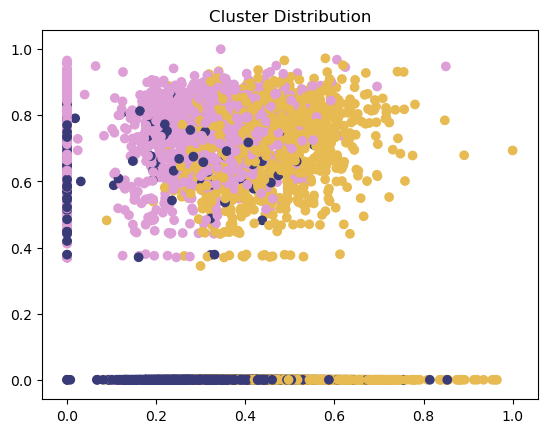

In [34]:
# Using our best model
model_aggl = AgglomerativeClustering(
        n_clusters=3,
        distance_threshold=None,
        linkage='complete',
        affinity='euclidean',
    )
    
labels_agglo = model_aggl.fit_predict(scaled_features_df)
    
n_clusters_actual = len(set(labels_agglo))  # Get the actual number of clusters

plt.title('Cluster Distribution')
plt.scatter(scaled_features_df['boxcox_PURCHASES'], scaled_features_df['boxcox_CASH_ADVANCE'], c=labels_agglo, cmap='tab20b')
plt.show()

### **What is Happening:**

#### **Behavioral Insight:**
- This plot suggests that customers might exhibit overlapping behaviors in terms of purchases and cash advances, making it harder to distinguish clusters clearly.

#### **Cluster Definition:**
- The overlap may indicate that the selected features alone are not sufficient to fully separate customer groups.
- Using additional features or a different clustering algorithm might improve separability.

#### **Cluster Quality:**
- Given the overlap, the silhouette score of the model is not very high, reflecting weaker cluster distinctness.


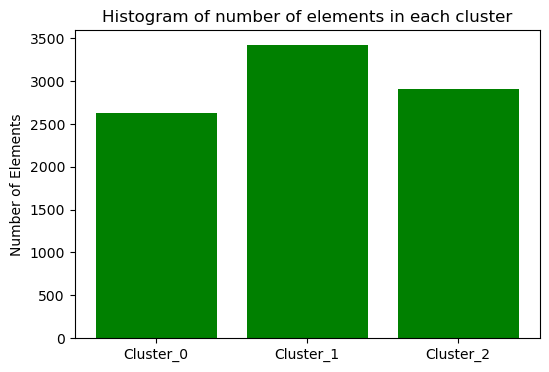

In [35]:
# Using histogram to show the number of elements in each cluster
# Number of clusters
n_clusters = len(labels_agglo)

# Count the number of elements in each cluster
unique, counts = np.unique(labels_agglo, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Creating custom labels
cluster_labels = [f'Cluster_{i}' for i in cluster_counts.keys()]

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.bar(cluster_labels, cluster_counts.values(), color='green')
plt.ylabel('Number of Elements')
plt.title('Histogram of number of elements in each cluster')
plt.show()

### **Histogram Analysis: Number of Elements in Each Cluster**

#### **Observations:**
- The histogram shows the distribution of elements across the 3 clusters resulting from the clustering process.
- **Cluster 1** has the highest number of elements, with approximately 3,500 members.
- **Cluster 0** and **Cluster 2** have slightly fewer members, each containing around 2,500–3,000 members.

#### **Key Insights:**
1. **Cluster 1 Dominance:** The larger size of Cluster 1 suggests it represents the most common behavior or characteristics among the customers in this dataset.
2. **Cluster Balance:** The three clusters are reasonably balanced, indicating that the segmentation does not disproportionately favor one group, which is ideal for meaningful analysis.
3. **Marketing Implication:** Marketing strategies can focus on the specific needs of each cluster, particularly the larger Cluster 1, to maximize impact and efficiency.

#### **Next Steps:**
- Use this information to design targeted marketing strategies tailored to the unique needs of each cluster.


In [36]:
# Creating DataFrames for each clusters
cluster_ = {}
for label in np.unique(labels_agglo):
    cluster_[label] = scaled_features_df[labels_agglo == label]

# Describing each cluster
for label, cluster_df in cluster_.items():
    print(f"Cluster_{label} Stastical Description:")
    print(cluster_df.describe())
    print("\n")

Cluster_0 Stastical Description:
       log_BALANCE  boxcox_CASH_ADVANCE  boxcox_PURCHASES  boxcox_PAYMENTS  \
count  2623.000000          2623.000000       2623.000000      2623.000000   
mean      0.444370             0.092279          0.291186         0.313237   
std       0.212202             0.240006          0.136505         0.136197   
min       0.000000             0.000000          0.000000         0.000000   
25%       0.293836             0.000000          0.222278         0.244176   
50%       0.432793             0.000000          0.305560         0.311075   
75%       0.616505             0.000000          0.380130         0.387736   
max       0.955843             0.885685          0.853361         1.000000   

       log_CREDIT_LIMIT  MINIMUM_PAYMENTS  CREDIT_UTILIZATION  \
count       2623.000000       2623.000000         2623.000000   
mean           0.620761          0.004503            0.009949   
std            0.123038          0.014673            0.016563   
min 

### **Cluster Analysis and Marketing Recommendations**

The statistical descriptions of the three clusters provide a detailed summary of the key characteristics for each cluster. Here's a concise analysis of each cluster:

---

### **Cluster 0**
#### **Customer Behavior:**
- Lower average balance (`log_BALANCE` mean: 0.44) compared to other clusters.
- Minimal use of cash advances (`boxcox_CASH_ADVANCE` mean: 0.09) and low credit utilization (`CREDIT_UTILIZATION` mean: 0.01).
- Moderate purchases (`boxcox_PURCHASES` mean: 0.29) and payment activity.

#### **Insights:**
- These customers are likely **conservative spenders** who rarely rely on cash advances and tend to keep their credit utilization low.

---

### **Cluster 1**
#### **Customer Behavior:**
- Moderate to high balance (`log_BALANCE` mean: 0.66) and significantly higher purchase activity (`boxcox_PURCHASES` mean: 0.45).
- Low credit utilization (`CREDIT_UTILIZATION` mean: 0.02) but high installment purchase frequency (`PURCHASES_INSTALLMENTS_FREQUENCY` mean: 0.69).
- Minimal reliance on cash advances.

#### **Insights:**
- Likely **frequent purchasers** who prefer installment payments and manage their credit responsibly. They represent a significant opportunity for **installment-based offers**.

---

### **Cluster 2**
#### **Customer Behavior:**
- Highest balance among clusters (`log_BALANCE` mean: 0.75) with heavy reliance on cash advances (`boxcox_CASH_ADVANCE` mean: 0.71).
- Minimal purchase activity (`boxcox_PURCHASES` mean: 0.11) and low installment frequency.
- Moderate credit utilization (`CREDIT_UTILIZATION` mean: 0.04).

#### **Insights:**
- These customers rely heavily on **cash advances** and use credit more frequently for **financial liquidity**. They might benefit from **balance transfer promotions** or tailored repayment plans.

---

### **Marketing Recommendations**
1. **Cluster 0:** Focus on promoting **rewards or cashback programs** to incentivize purchases.
2. **Cluster 1:** Offer **installment-based payment plans** or exclusive deals for frequent purchasers.
3. **Cluster 2:** Introduce **balance transfer offers** or low-interest repayment plans to reduce dependency on cash advances.
